In [1]:
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt

### Scatter plots
#### What to do with too much information!

First, let's make some random data sets. Here, we'll just say there are several data sets each observing some "relation" with a degree of error and with different coverages of the independent variable.

In [7]:
Nsets = 12
Nsmallest = 5
Nbiggest = 100
min_bounds = rnd.uniform(0, 2, Nsets)
max_bounds = rnd.uniform(2, 6, Nsets)
ndat_sets  = rnd.randint(Nsmallest, Nbiggest, Nsets)
sigma = rnd.uniform(0.3, 0.9, Nsets)
offsets = rnd.uniform(0.1, 0.3, Nsets)

deviat = [rnd.normal(0, sigma[i], ndat_sets[i]) for i in range(Nsets)]
x = [rnd.uniform(min_bounds[i], max_bounds[i], ndat_sets[i]) for i in range(Nsets)]
y = [2.2*x[i] + 1.1 + deviat[i] + offsets[i] for i in range(Nsets)]
ID = [(i+1)*np.ones(ndat_sets[i]) for i in range(Nsets)]
labels = ["Data %d"%(i+1) for i in range(Nsets)]

Let's make a quick plot here just to see what we're working with....

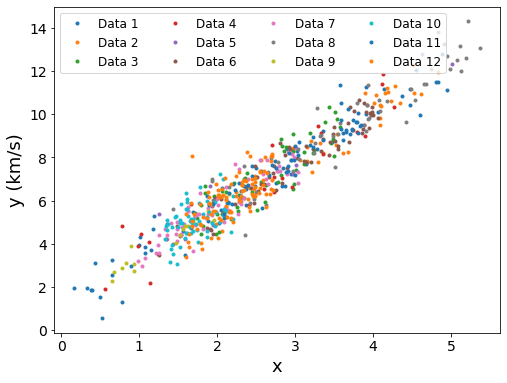

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i in range(Nsets):
    ax.plot(x[i], y[i], '.', label=labels[i])
ax.legend(ncol=4, fontsize=12)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y (km/s)", fontsize=18)
ax.tick_params(which='both', axis='both', labelsize=14)
plt.show()

So, there's a lot of overlapping, a lot of color confusion, and while it's clear there is a trend, it's unclear where each data set is covering. Here, it's time to think of a few things....
 - Does identifying each dataset actually matter?
 - What are the data sets separated as? Is it a qualitative variable? Quantitive?
 - Can you group the data sets into "macro" sets?
 
Depending on what your answers are, this will change how to improve this plot!

### If the dataset doesn't matter

In [8]:
x1D = np.hstack(np.array(x, dtype=object))
y1D = np.hstack(np.array(y, dtype=object))
ID1D = np.hstack(np.array(ID, dtype=object))

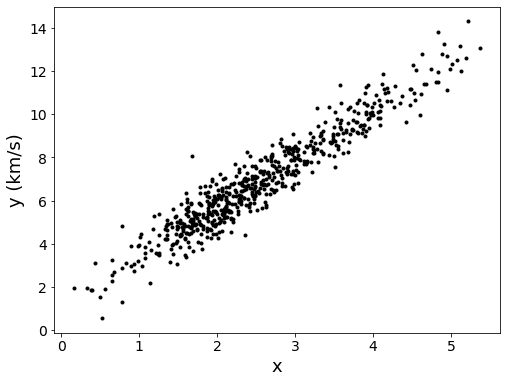

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x1D, y1D, 'k.')
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y (km/s)", fontsize=18)
ax.tick_params(which='both', axis='both', labelsize=14)
plt.show()

But, now there's way too much data on a scatter.... can always bin the data!

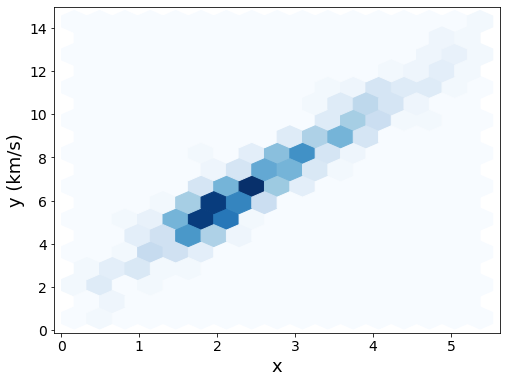

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hexbin(x1D, y1D, gridsize=16, cmap=plt.cm.Blues)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y (km/s)", fontsize=18)
ax.tick_params(which='both', axis='both', labelsize=14)
plt.show()

### Using macro sets

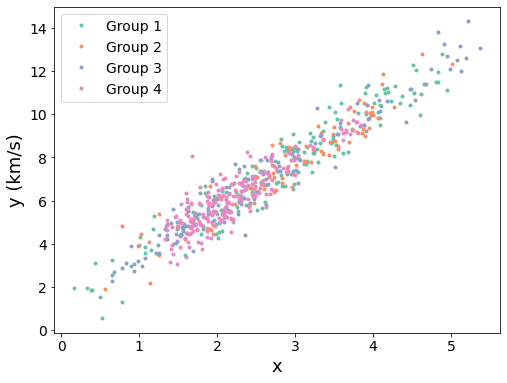

In [18]:
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]
labelM = ["Group 1", "Group 2", "Group 3", "Group 4"]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i in range(Nsets):
    j = int(i/3)
    k = i%3
    if k == 0:
        ax.plot(x[i], y[i], '.', label=labelM[j], color=colors[j])
    else:
        ax.plot(x[i], y[i], '.', color=colors[j])
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y (km/s)", fontsize=18)
ax.tick_params(which='both', axis='both', labelsize=14)
plt.show()